In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
lb=LabelEncoder()

In [2]:
ss=pd.read_csv("upload.csv")

In [3]:
ss

,Id,Date,Open,High,Low,Close,Volume,Turnover,Indices
0,1,03-10-2011,2877.75,2877.75,2798.50,2804.70,44481268.0,1.159290e+10,NIFTY METAL
1,2,04-10-2011,2789.00,2835.40,2726.60,2760.45,44854372.0,1.047380e+10,NIFTY METAL
2,3,05-10-2011,2782.10,2808.30,2738.85,2745.30,52547557.0,1.037740e+10,NIFTY METAL
3,4,07-10-2011,2832.50,2895.80,2832.50,2889.55,51353782.0,1.131810e+10,NIFTY METAL
4,5,10-10-2011,2886.45,2951.90,2876.35,2943.70,53634854.0,1.231390e+10,NIFTY METAL
...,...,...,...,...,...,...,...,...,...
8913,8914,22-Feb-21,25579.75,25617.35,24646.45,24766.45,36356027.0,4.639880e+03,NIFTY_IT
8914,8915,23-Feb-21,24933.70,25199.60,24709.15,24807.80,32326536.0,4.132380e+03,NIFTY_IT
8915,8916,24-Feb-21,24814.55,24872.35,24518.70,24779.40,19719480.0,2.748240e+03,NIFTY_IT
8916,8917,25-Feb-21,24979.00,25199.80,24830.70,24872.45,34541172.0,4.399080e+03,NIFTY_IT


In [4]:
ss['Date'] = pd.to_datetime(ss['Date'])
ss['Year'] = ss['Date'].dt.year
ss['Month'] =ss['Date'].dt.month
ss['Day'] = ss['Date'].dt.day


In [5]:
ss


,Id,Date,Open,High,Low,Close,Volume,Turnover,Indices,Year,Month,Day
0,1,2011-03-10,2877.75,2877.75,2798.50,2804.70,44481268.0,1.159290e+10,NIFTY METAL,2011,3,10
1,2,2011-04-10,2789.00,2835.40,2726.60,2760.45,44854372.0,1.047380e+10,NIFTY METAL,2011,4,10
2,3,2011-05-10,2782.10,2808.30,2738.85,2745.30,52547557.0,1.037740e+10,NIFTY METAL,2011,5,10
3,4,2011-07-10,2832.50,2895.80,2832.50,2889.55,51353782.0,1.131810e+10,NIFTY METAL,2011,7,10
4,5,2011-10-10,2886.45,2951.90,2876.35,2943.70,53634854.0,1.231390e+10,NIFTY METAL,2011,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
8913,8914,2021-02-22,25579.75,25617.35,24646.45,24766.45,36356027.0,4.639880e+03,NIFTY_IT,2021,2,22
8914,8915,2021-02-23,24933.70,25199.60,24709.15,24807.80,32326536.0,4.132380e+03,NIFTY_IT,2021,2,23
8915,8916,2021-02-24,24814.55,24872.35,24518.70,24779.40,19719480.0,2.748240e+03,NIFTY_IT,2021,2,24
8916,8917,2021-02-25,24979.00,25199.80,24830.70,24872.45,34541172.0,4.399080e+03,NIFTY_IT,2021,2,25


# RANDOM FOREST 

In [6]:
ss.to_csv('op.csv')
op= pd.read_csv('op.csv')
op = op.drop('Unnamed: 0', axis = 1)

In [7]:
op

,Id,Date,Open,High,Low,Close,Volume,Turnover,Indices,Year,Month,Day
0,1,2011-03-10,2877.75,2877.75,2798.50,2804.70,44481268.0,1.159290e+10,NIFTY METAL,2011,3,10
1,2,2011-04-10,2789.00,2835.40,2726.60,2760.45,44854372.0,1.047380e+10,NIFTY METAL,2011,4,10
2,3,2011-05-10,2782.10,2808.30,2738.85,2745.30,52547557.0,1.037740e+10,NIFTY METAL,2011,5,10
3,4,2011-07-10,2832.50,2895.80,2832.50,2889.55,51353782.0,1.131810e+10,NIFTY METAL,2011,7,10
4,5,2011-10-10,2886.45,2951.90,2876.35,2943.70,53634854.0,1.231390e+10,NIFTY METAL,2011,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
8913,8914,2021-02-22,25579.75,25617.35,24646.45,24766.45,36356027.0,4.639880e+03,NIFTY_IT,2021,2,22
8914,8915,2021-02-23,24933.70,25199.60,24709.15,24807.80,32326536.0,4.132380e+03,NIFTY_IT,2021,2,23
8915,8916,2021-02-24,24814.55,24872.35,24518.70,24779.40,19719480.0,2.748240e+03,NIFTY_IT,2021,2,24
8916,8917,2021-02-25,24979.00,25199.80,24830.70,24872.45,34541172.0,4.399080e+03,NIFTY_IT,2021,2,25


In [8]:
y=op['Close']

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
op['Indices']=le.fit_transform(op['Indices'].astype("str"))
op['Indices'].value_counts()

2    4355
0    2331
1    2232
Name: Indices, dtype: int64

In [10]:
X = op[['Day','Month','Year','Indices']]

In [11]:
X

,Day,Month,Year,Indices
0,10,3,2011,0
1,10,4,2011,0
2,10,5,2011,0
3,10,7,2011,0
4,10,10,2011,0
...,...,...,...,...
8913,22,2,2021,2
8914,23,2,2021,2
8915,24,2,2021,2
8916,25,2,2021,2


In [13]:
X_poly2, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .3, random_state = 1)

In [14]:
regressor= RandomForestRegressor(n_estimators=15, random_state=0)
imbalanced=regressor.fit(X_poly2,ytrain)
y_pred = imbalanced.predict(Xtest)

In [15]:
print("Accuracy =",r2_score(ytest,y_pred))

Accuracy = 0.9938499953353137


# DECISION TREE 

In [16]:
ss.to_csv('us.csv')
us= pd.read_csv('us.csv')
us = us.drop('Unnamed: 0', axis = 1)

In [17]:
y1=us['Close']

In [18]:
x1 = us[['Month','Day','Year','Open','High','Low','Indices']]

In [19]:
x1['Month'] = lb.fit_transform(x1['Month'])
x1['Year'] = lb.fit_transform(x1['Year'])
x1['Open'] = lb.fit_transform(x1['Open'])
x1['High'] = lb.fit_transform(x1['High'])
x1['Low'] = lb.fit_transform(x1['Low'])
x1['Day'] = lb.fit_transform(x1['Day'])
x1['Indices'] = lb.fit_transform(x1['Indices'])

<ipython-input-19-e505ebfd74f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Month'] = lb.fit_transform(x1['Month'])
<ipython-input-19-e505ebfd74f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Year'] = lb.fit_transform(x1['Year'])
<ipython-input-19-e505ebfd74f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [20]:
X1train, X1test, y1train, y1test = train_test_split(x1, y1, test_size = .3, random_state = 1)

In [21]:
decision_trees = DecisionTreeRegressor()
decision_trees.fit(X1train, y1train)
decision_boundary = decision_trees.predict(X1train)
y_pred1 = decision_trees.predict(X1test)

In [22]:
print("Accuracy =",r2_score(y1test,y_pred1))

Accuracy = 0.9996955969692642


# LINEAR REGRESSION


In [23]:
ss.to_csv('ap.csv')
ap= pd.read_csv('ap.csv')
ap = ap.drop('Unnamed: 0', axis = 1)

In [24]:
y12=ap['Close']

In [25]:
x12 = ap[['Month','Day','Year','Open','High','Low','Indices']]

In [26]:
x12['Month'] = lb.fit_transform(x12['Month'])
x12['Year'] = lb.fit_transform(x12['Year'])
x12['Open'] = lb.fit_transform(x12['Open'])
x12['High'] = lb.fit_transform(x12['High'])
x12['Low'] = lb.fit_transform(x12['Low'])
x12['Day'] = lb.fit_transform(x12['Day'])
x12['Indices'] = lb.fit_transform(x12['Indices'])

<ipython-input-26-f8f90e07f448>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x12['Month'] = lb.fit_transform(x12['Month'])
<ipython-input-26-f8f90e07f448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x12['Year'] = lb.fit_transform(x12['Year'])
<ipython-input-26-f8f90e07f448>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [27]:
X12train, X12test, y12train, y12test = train_test_split(x12, y12, test_size = .3, random_state = 1)

In [28]:
classifier112 = LinearRegression()
pp=classifier112.fit(X12train, y12train)
y_pred123 =pp.predict(X12test)

In [29]:
print("Accuracy =",r2_score(y12test,y_pred123))

Accuracy = 0.8767684834671816


# LSTM

In [30]:
ss.to_csv('df.csv')
df= pd.read_csv('df.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [31]:
df.head()

,Id,Date,Open,High,Low,Close,Volume,Turnover,Indices,Year,Month,Day
0,1,2011-03-10,2877.75,2877.75,2798.50,2804.70,44481268.0,1.159290e+10,NIFTY METAL,2011,3,10
1,2,2011-04-10,2789.00,2835.40,2726.60,2760.45,44854372.0,1.047380e+10,NIFTY METAL,2011,4,10
2,3,2011-05-10,2782.10,2808.30,2738.85,2745.30,52547557.0,1.037740e+10,NIFTY METAL,2011,5,10
3,4,2011-07-10,2832.50,2895.80,2832.50,2889.55,51353782.0,1.131810e+10,NIFTY METAL,2011,7,10
4,5,2011-10-10,2886.45,2951.90,2876.35,2943.70,53634854.0,1.231390e+10,NIFTY METAL,2011,10,10


In [32]:
df.tail()

,Id,Date,Open,High,Low,Close,Volume,Turnover,Indices,Year,Month,Day
8913,8914,2021-02-22,25579.75,25617.35,24646.45,24766.45,36356027.0,4639.88,NIFTY_IT,2021,2,22
8914,8915,2021-02-23,24933.70,25199.60,24709.15,24807.80,32326536.0,4132.38,NIFTY_IT,2021,2,23
8915,8916,2021-02-24,24814.55,24872.35,24518.70,24779.40,19719480.0,2748.24,NIFTY_IT,2021,2,24
8916,8917,2021-02-25,24979.00,25199.80,24830.70,24872.45,34541172.0,4399.08,NIFTY_IT,2021,2,25
8917,8918,2021-02-26,24611.20,24689.00,24212.80,24301.45,49174264.0,6004.92,NIFTY_IT,2021,2,26


In [33]:
df1=df.reset_index()['Close']

In [34]:
df1

0        2804.70
1        2760.45
2        2745.30
3        2889.55
4        2943.70
          ...   
8913    24766.45
8914    24807.80
8915    24779.40
8916    24872.45
8917    24301.45
Name: Close, Length: 8918, dtype: float64

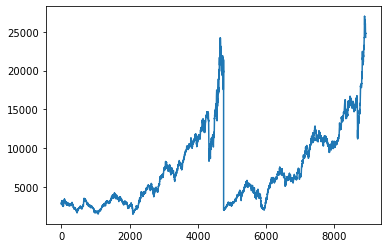

In [35]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
print(df1)

[[0.05127271]
 [0.0495396 ]
 [0.04894623]
 ...
 [0.91194222]
 [0.91558665]
 [0.89322265]]


In [38]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [39]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 (0:0+100)
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])###0+100,0(100:0)
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.compile(loss='mean_squared_error')

In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30)

Epoch 1/30
89/89 [==============================] - 20s 225ms/step - loss: 5.1115e-04 - val_loss: 0.0016
Epoch 2/30
89/89 [==============================] - 19s 215ms/step - loss: 5.3609e-04 - val_loss: 1.1689e-04
Epoch 3/30
89/89 [==============================] - 19s 217ms/step - loss: 4.2309e-04 - val_loss: 5.3637e-04
Epoch 4/30
89/89 [==============================] - 19s 217ms/step - loss: 3.9666e-04 - val_loss: 0.0017
Epoch 5/30
89/89 [==============================] - 19s 215ms/step - loss: 4.1759e-04 - val_loss: 1.8236e-04
Epoch 6/30
89/89 [==============================] - 19s 215ms/step - loss: 3.8093e-04 - val_loss: 4.6636e-04
Epoch 7/30
89/89 [==============================] - 19s 215ms/step - loss: 3.0248e-04 - val_loss: 7.1148e-04
Epoch 8/30
89/89 [==============================] - 19s 215ms/step - loss: 3.3436e-04 - val_loss: 1.2696e-04
Epoch 9/30
89/89 [==============================] - 19s 217ms/step - loss: 2.5096e-04 - val_loss: 0.0021
Epoch 10/30
89/89 [============

In [70]:
train_predict=model.predict(X_train)
test_score = print(r2_score(y_train,train_predict)

68.54488199656646


#  PICKLE

In [44]:
Day = 26
Month =2
Year =2021
Indices=2

In [97]:
import pickle

pickle.dump(poly2,open('poly.pkl','wb'))
pol = pickle.load(open('poly.pkl','rb'))